## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [2]:
df = pd.read_csv("../data/raw/data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

## Exploratory Data Analysis (EDA)

In [4]:
print("--- Starting Exploratory Data Analysis (EDA) ---")

# --- 1. Overview of the Data ---
print("\n## 1. Data Overview (Shape and Types)")
print(f"Shape of the dataset (Rows, Columns): {df.shape}")
print("\n--- Data Types ---")
print(df.info())



--- Starting Exploratory Data Analysis (EDA) ---

## 1. Data Overview (Shape and Types)
Shape of the dataset (Rows, Columns): (95662, 16)

--- Data Types ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value         

In [5]:
# 1. Temporal Typecasting
print("Casting 'TransactionStartTime' to datetime...")
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

# 2. Categorical Typecasting (Codes and Labels)
categorical_to_cast = [
    'CountryCode', 'PricingStrategy', 'FraudResult',
    'CurrencyCode', 'ProviderId', 'ProductId',
    'ProductCategory', 'ChannelId'
]
print("Casting code and label columns to 'category'...")
df[categorical_to_cast] = df[categorical_to_cast].astype('category')
print("\n--- Typecasting Complete ---")
print("New Data Types:")
print(df.info())

Casting 'TransactionStartTime' to datetime...
Casting code and label columns to 'category'...

--- Typecasting Complete ---
New Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   TransactionId         95662 non-null  object             
 1   BatchId               95662 non-null  object             
 2   AccountId             95662 non-null  object             
 3   SubscriptionId        95662 non-null  object             
 4   CustomerId            95662 non-null  object             
 5   CurrencyCode          95662 non-null  category           
 6   CountryCode           95662 non-null  category           
 7   ProviderId            95662 non-null  category           
 8   ProductId             95662 non-null  category           
 9   ProductCategory       95662 non-null  category       

In [6]:
# --- Identify feature types ---
# For robust analysis, we separate columns by their actual data type
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\nIdentified Numerical Features: {numerical_cols}")
print(f"Identified Categorical Features: {categorical_cols}")


Identified Numerical Features: ['Amount', 'Value']
Identified Categorical Features: ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'PricingStrategy', 'FraudResult']


In [7]:
# --- 2. Summary Statistics ---
print("\n## 2. Summary Statistics for Numerical Features")
print(df[numerical_cols].describe(percentiles=[.25, .5, .75, .95]).T)

print("\n## Summary Statistics for Categorical Features")
for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts(normalize=True).head(5))


## 2. Summary Statistics for Numerical Features
          count         mean            std        min    25%     50%     75%  \
Amount  95662.0  6717.846433  123306.797164 -1000000.0  -50.0  1000.0  2800.0   
Value   95662.0  9900.583941  123122.087776        2.0  275.0  1000.0  5000.0   

            95%        max  
Amount  14500.0  9880000.0  
Value   25000.0  9880000.0  

## Summary Statistics for Categorical Features

--- TransactionId ---
TransactionId
TransactionId_76871    0.00001
TransactionId_73770    0.00001
TransactionId_26203    0.00001
TransactionId_380      0.00001
TransactionId_28195    0.00001
Name: proportion, dtype: float64

--- BatchId ---
BatchId
BatchId_67019     0.000293
BatchId_51870     0.000167
BatchId_113893    0.000146
BatchId_127204    0.000125
BatchId_116835    0.000105
Name: proportion, dtype: float64

--- AccountId ---
AccountId
AccountId_4841    0.322939
AccountId_4249    0.046591
AccountId_4840    0.018168
AccountId_3206    0.011551
AccountId_318    


## 3. Distribution Visualization for Numerical Features


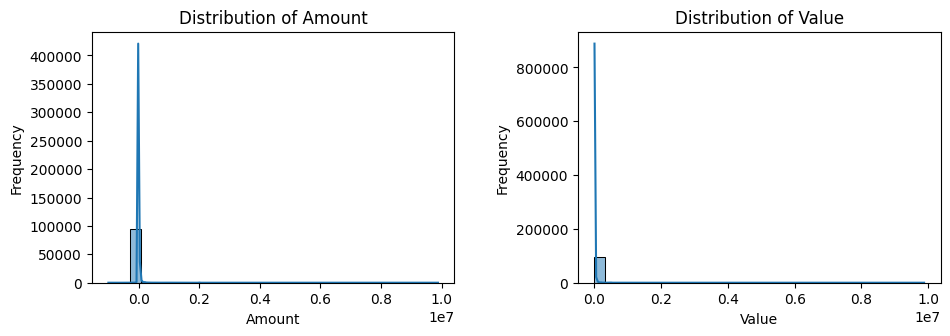

In [8]:
# --- 3. Distribution of Numerical Features ---
print("\n## 3. Distribution Visualization for Numerical Features")

# Create a figure with subplots for each numerical column
n_plots = len(numerical_cols)
n_cols = 3  # Number of columns in the subplot grid
n_rows = (n_plots + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten() # Flatten the axes array for easy iteration

# Plot a histogram/KDE for each numerical feature
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3.0)
plt.show()

c:\Users\Lenovo\Documents\KAIM\Week4\Credit-Risk-Model\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


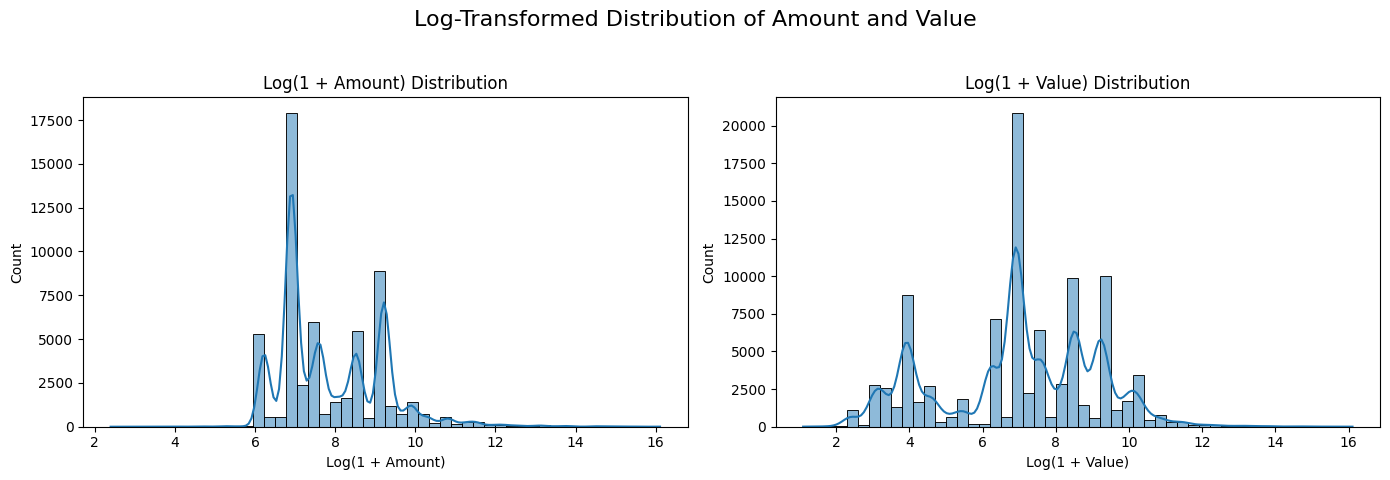

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Log-Transformed Distribution of Amount and Value', fontsize=16)

# Create a function to safely apply log(1+x)
def safe_log_transform(series):
    # Use np.log1p which calculates log(1+x)
    return np.log1p(series)

# Plot 1: Log-transformed Amount
sns.histplot(safe_log_transform(df['Amount']), kde=True, bins=50, ax=axes[0])
axes[0].set_title('Log(1 + Amount) Distribution')
axes[0].set_xlabel('Log(1 + Amount)')

# Plot 2: Log-transformed Value
sns.histplot(safe_log_transform(df['Value']), kde=True, bins=50, ax=axes[1])
axes[1].set_title('Log(1 + Value) Distribution')
axes[1].set_xlabel('Log(1 + Value)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## 4. Distribution Visualization for Categorical Features
Skipping plot for TransactionId: Too many unique values (95662)
Skipping plot for BatchId: Too many unique values (94809)
Skipping plot for AccountId: Too many unique values (3633)
Skipping plot for SubscriptionId: Too many unique values (3627)
Skipping plot for CustomerId: Too many unique values (3742)


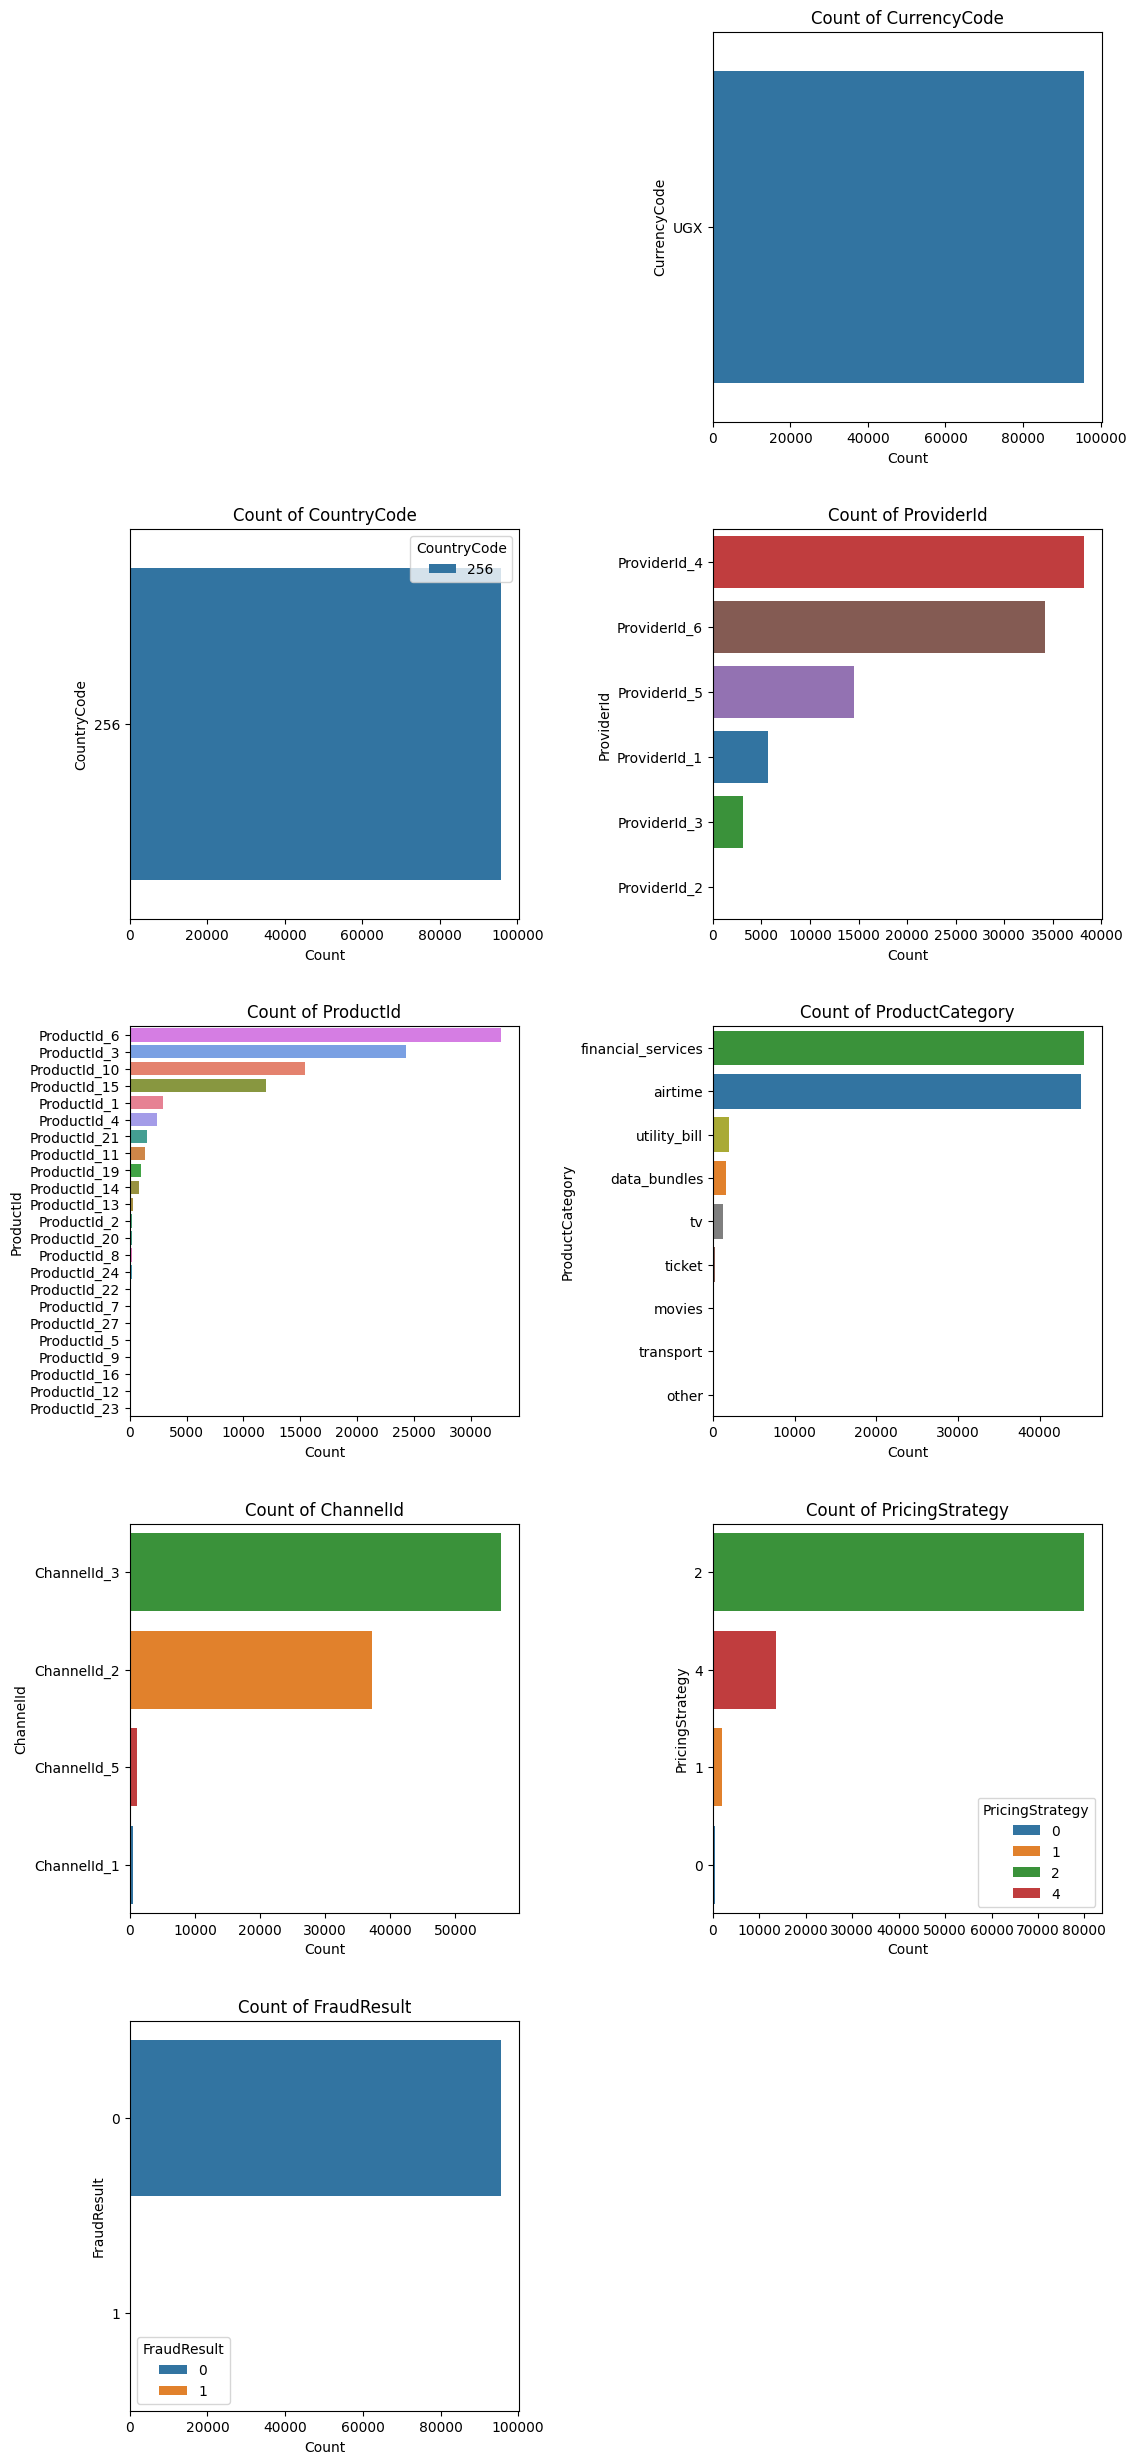

In [ ]:
# --- 4. Distribution of Categorical Features ---
print("\n## 4. Distribution Visualization for Categorical Features")

n_plots = len(categorical_cols)
n_cols = 2
n_rows = (n_plots + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows))
axes = axes.flatten()

# Plot a countplot for each categorical feature
for i, col in enumerate(categorical_cols):
    # Use value_counts to check unique count, and only plot if not too many unique values
    if df[col].nunique() < 50:
        order = df[col].value_counts().index # Order by frequency
        sns.countplot(y=df[col], order=order, ax=axes[i], hue=df[col])
        axes[i].set_title(f'Count of {col}', fontsize=12)
        axes[i].set_xlabel('Count')
        axes[i].set_ylabel(col)
    else:
        # If too many unique values, just print the top N
        print(f"Skipping plot for {col}: Too many unique values ({df[col].nunique()})")
        fig.delaxes(axes[i]) # Remove the subplot if skipped

# Hide any unused subplots  
for j in range(len(categorical_cols), len(axes)):
    if j < len(axes):
        fig.delaxes(axes[j])

plt.tight_layout(pad=3.0)
plt.show()


## 5. Correlation Analysis (Numerical Features)


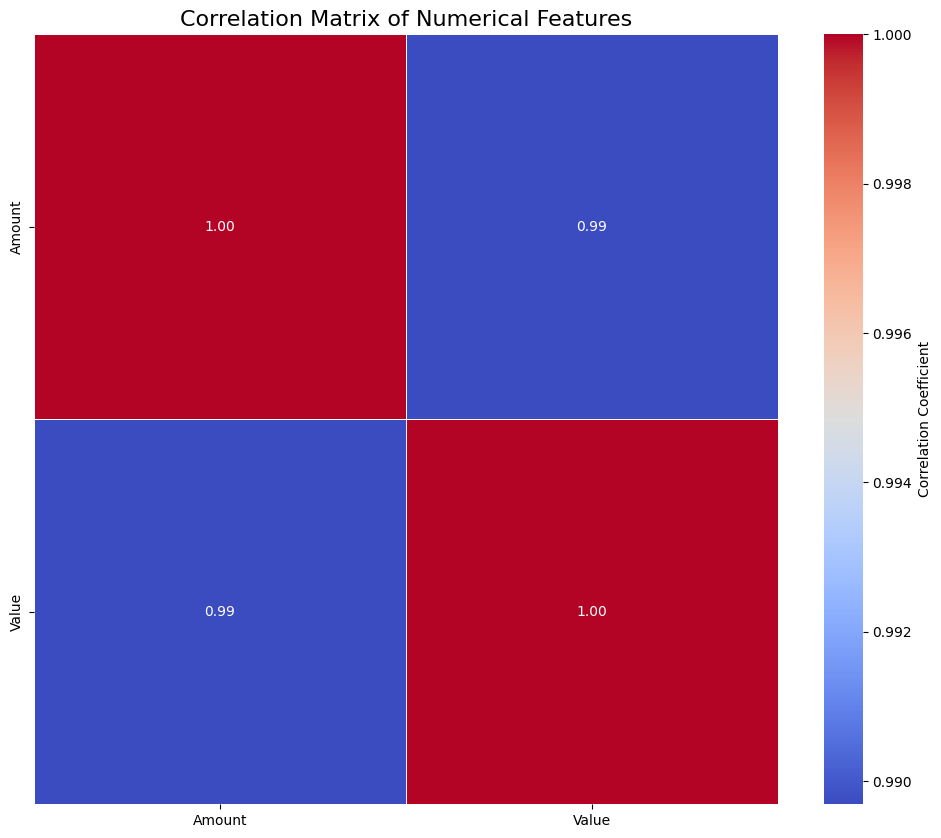

In [11]:
# --- 5. Correlation Analysis (Heatmap) ---
print("\n## 5. Correlation Analysis (Numerical Features)")

if numerical_cols:
    plt.figure(figsize=(12, 10))
    # Calculate the correlation matrix
    correlation_matrix = df[numerical_cols].corr()

    # Create a heatmap
    sns.heatmap(correlation_matrix,
                annot=True,          # Show correlation values on the map
                fmt=".2f",           # Format to 2 decimal places
                cmap='coolwarm',     # Color map
                linewidths=.5,       # Space between cells
                cbar_kws={'label': 'Correlation Coefficient'})
    plt.title('Correlation Matrix of Numerical Features', fontsize=16)
    plt.show()
# 
else:
    print("Not enough numerical features for correlation analysis.")

In [15]:
# --- 6. Identifying Missing Values ---
print("\n## 6. Missing Value Analysis")

# Calculate the percentage of missing values for each column
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
missing_percent = (missing_data / len(df)) * 100

# Create a DataFrame for easy viewing
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percent': missing_percent.round(2)
})

if not missing_df.empty:
    print(missing_df)
else:
    print("No missing values found in the dataset.")


## 6. Missing Value Analysis
No missing values found in the dataset.



## 7. Outlier Detection using Box Plots (Numerical Features)


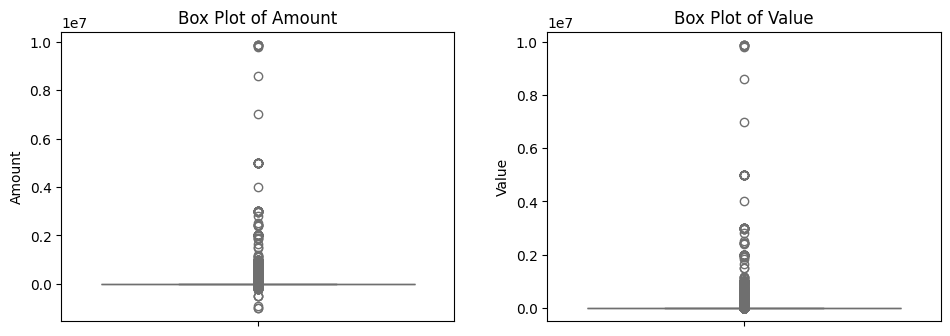

In [16]:
# --- 7. Outlier Detection (Box Plots) ---
print("\n## 7. Outlier Detection using Box Plots (Numerical Features)")

# Use the same subplot setup as the distribution plots
n_plots = len(numerical_cols)
n_cols = 3
n_rows = (n_plots + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

# Plot a box plot for each numerical feature
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box Plot of {col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)

# Hide any unused subplots
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3.0)
plt.show()